In [22]:
import numpy as np
import matplotlib.pyplot as plt
#Distribución lineal de torbellinos
a=0
b=1
def gamma(t0):
    gammaA = 4.6
    gammaB = 6.3
    return gammaA + gammaB*(t0-a)

def fdot(t,num=10**7):
    t0 = np.linspace(a,b,num)
    fd=0
    dt0 = (b-a)/num
    for i in range(num):
        fd+=gamma(t0[i])/(t-t0[i])
    fd *= dt0*(1j/(2*np.pi))
    return fd

#Punto de interés
t1 = complex(6.5, 3.0)
fd = fdot(t1)
u1,v1 = [fd.real,-fd.imag]

redon=4
print('Vel horizontal de',t1,'es:',u1,'m/s')
print('Vel horizontal redondeada es:',round(u1,redon),'m/s')
print('Vel vertical de',t1,'es:',v1,'m/s')
print('Vel vertical redondeada es:',round(v1,redon),'m/s')

Vel horizontal de (6.5+3j) es: 0.08405729410473878 m/s
Vel horizontal redondeada es: 0.0841 m/s
Vel vertical de (6.5+3j) es: -0.1656325717183276 m/s
Vel vertical redondeada es: -0.1656 m/s


In [37]:
import cmath as c
#Compruebo con la integral analítica
#según symbolab queda aproximadamente:
def fdotsym(t):
    return 0.15915j * (-4.6*(c.log(t-1)-c.log(t)) + 6.3*(-t*(c.log(t-1)-c.log(t))-1))
fdsym = fdotsym(t1)
u1sym,v1sym = [fdsym.real,-fdsym.imag]
redon=4
print('Desde la integral analítica:')
print('Vel horizontal de',t1,'es:',u1sym,'m/s')
print('Vel horizontal redondeada es:',round(u1sym,redon),'m/s')
print('Vel vertical de',t1,'es:',v1sym,'m/s')
print('Vel vertical redondeada es:',round(v1sym,redon),'m/s')

Desde la integral analítica:
Vel horizontal de (6.5+3j) es: 0.08405468305604691 m/s
Vel horizontal redondeada es: 0.0841 m/s
Vel vertical de (6.5+3j) es: -0.16562742720792242 m/s
Vel vertical redondeada es: -0.1656 m/s


In [23]:
fdots = []
for i in range(4):
    fdots.append(fdot(t1,10**(5+i)).imag)
    if i>0:
        delta=(fdots[i]-fdots[i-1])
        print('Para 10^('+str(5+i)+'), tenemos delta =',delta)

Para 10^(6), tenemos delta = -2.1058494809045314e-08
Para 10^(7), tenemos delta = -2.10583600557257e-09
Para 10^(8), tenemos delta = -2.1061394295252e-10


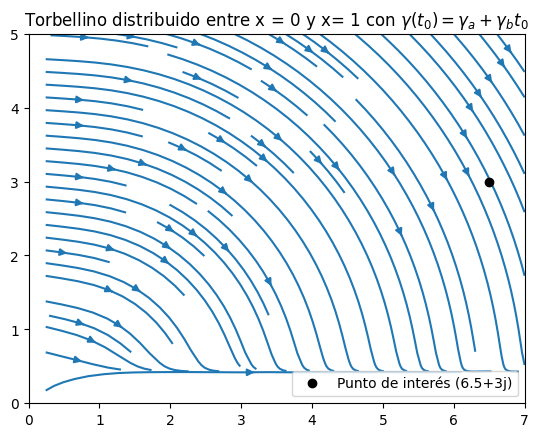

In [34]:
import matplotlib.pyplot as plt
n=50
x=np.linspace(0,7,n)
y=np.linspace(0,5,n)
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

for i in range(n):
    for j in range(n):
        t = complex(X[i][j],Y[j][i])
        U[i][j]=fdot(t,10**2).real
        V[j][i]=-fdot(t,10**2).imag

plt.title('Torbellino distribuido entre x = 0 y x= 1 con '+r'$\gamma (t_0)= \gamma _a + \gamma _b t_0 $')
plt.streamplot(X,Y,U,V)
plt.plot(t1.real,t1.imag,'o',color='black',label='Punto de interés '+str(t1))
plt.legend()
plt.show()